## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, _linear_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score


### Load the dataset

In [229]:
data_sheet="./tips.csv"
df = pd.read_csv(data_sheet)

In [230]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [231]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()


In [232]:
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['sex', 'smoker', 'day', 'time']


In [233]:
print("Numerical Columns:", numerical_cols)


Numerical Columns: ['total_bill', 'tip', 'size']


In [234]:
# Code from Faculty

cat = []
num = []


In [235]:
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)
    

In [236]:
print("Categorical Columns:\n", cat)


Categorical Columns:
 ['sex', 'smoker', 'day', 'time']


In [237]:
print("Numerical Columns:\n", num)


Numerical Columns:
 ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [238]:
average_bill_per_day = df.groupby('day')['total_bill'].mean().reset_index()


In [239]:
average_bill_per_day.columns = ['day', 'average_total_bill']


In [240]:
print(average_bill_per_day)


    day  average_total_bill
0   Fri           17.151579
1   Sat           20.441379
2   Sun           21.410000
3  Thur           17.682742


In [241]:
df.groupby('day')['total_bill'].mean()


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [242]:
average_tip_per_gender = df.groupby('sex')['tip'].mean().reset_index()


In [243]:
average_tip_per_gender.columns = ['gender', 'average_tip']


In [244]:
print(average_tip_per_gender)


   gender  average_tip
0  Female     2.833448
1    Male     3.089618


In [245]:
df.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [246]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [247]:
# Male Gender is Generous in giving Tips

### 4. According to the data, were there more customers for dinner or lunch?

In [248]:
customer_count_per_time = df['time'].value_counts().reset_index()


In [249]:
customer_count_per_time.columns = ['time', 'customer_count']


In [250]:
print(customer_count_per_time)


     time  customer_count
0  Dinner             176
1   Lunch              68


In [251]:
customer_count_per_time = df.groupby('time').size().reset_index(name='customer_count')
print(customer_count_per_time)

     time  customer_count
0  Dinner             176
1   Lunch              68


In [252]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

In [253]:
# According to the data for dinner there are more customers.


### 5. Based on the statistical summary, comment on the variable 'tip'

In [254]:
tip_summary = df['tip'].describe()
tip_summary

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Comments on the 'tip' Variable

Central Tendency: 
The mean and median values provide insight into the average tipping behavior. If the mean is significantly higher than the median, it may indicate a few high tips skewing the average.

Dispersion: 
The standard deviation gives an idea of how varied the tip amounts are. A high standard deviation suggests that the tips vary widely, while a low standard deviation indicates that most tips are close to the mean.

Range: 
The minimum and maximum values reveal the spread of tips. If the range is large, it suggests that there are both very low and very high tips in the dataset.

Percentiles: 
The 25th and 75th percentiles can indicate the interquartile range (IQR), which helps in understanding the distribution and identifying potential outliers.

Skewness: 
If the distribution of tips is skewed (as inferred from the mean vs. median), it could suggest that a minority of customers are giving significantly higher tips.

In [255]:
# There are some outliers as we can see where max tip is very higher than that of the mean.


### 6. Find the busiest day in terms of the orders?

In [256]:
df = pd.read_csv('tips.csv')

df.day.mode()

0    Sat
Name: day, dtype: object

In [257]:
df['day'].mode()

0    Sat
Name: day, dtype: object

In [258]:
order_counts = df['day'].value_counts().reset_index()
order_counts.columns = ['day', 'order_count']


In [259]:
busiest_day = order_counts.loc[order_counts['order_count'].idxmax()]
print("Busiest Day:", busiest_day['day'], "with", busiest_day['order_count'], "orders")


Busiest Day: Sat with 87 orders


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

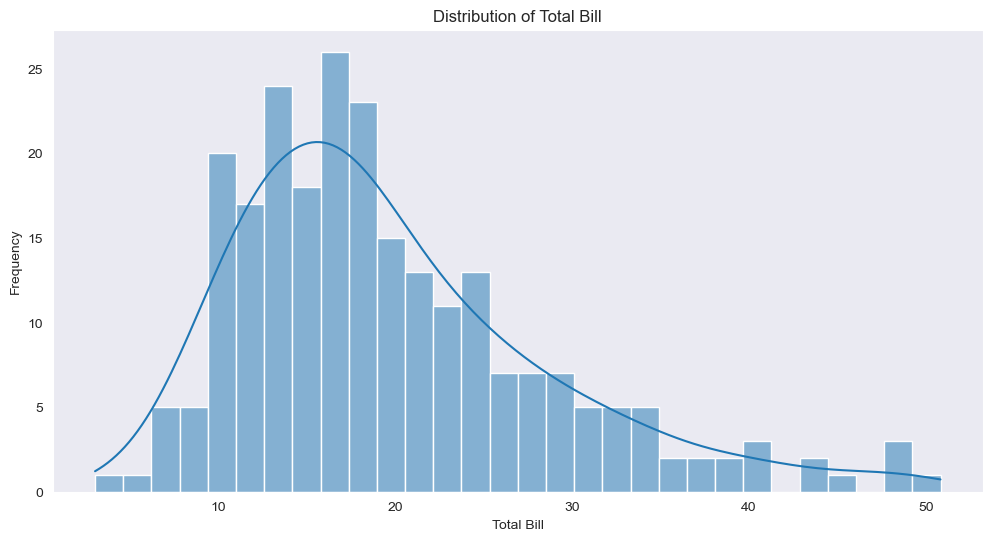

In [260]:
df = pd.read_csv('tips.csv')

# Check the skewness
skewness = df['total_bill'].skew()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['total_bill'], kde=True, bins=30)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.grid()
plt.show()


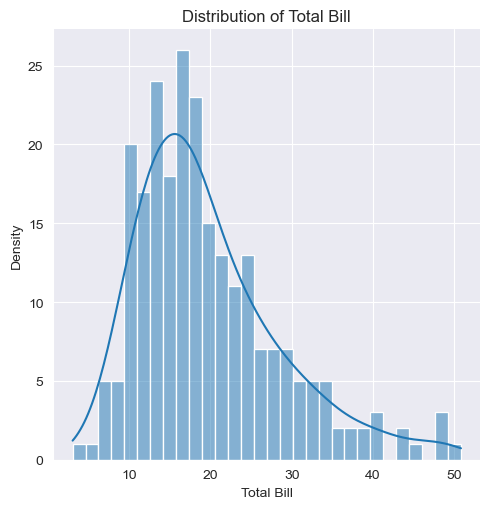

In [261]:
#From GL Faculty
sns.displot(df['total_bill'], kde=True, bins=30)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.show()

In [262]:

# Print skewness result
if skewness > 0:
    skew_type = 'right skewed'
elif skewness < 0:
    skew_type = 'left skewed'
else:
    skew_type = 'no skew'
    
print(f'The total_bill variable has a skewness of {skewness:.2f}, indicating it is {skew_type}.')

The total_bill variable has a skewness of 1.13, indicating it is right skewed.


In [263]:
df['total_bill'].skew()

1.1332130376158205

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

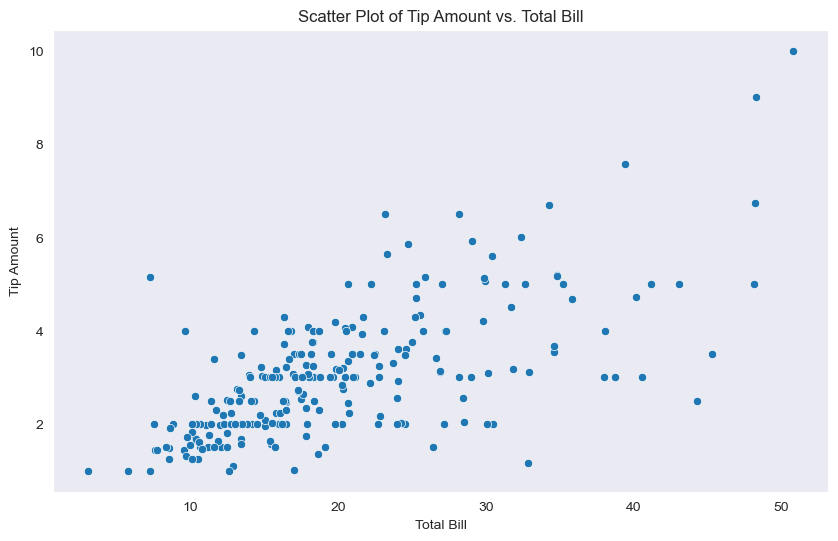

In [264]:
df = pd.read_csv('tips.csv')

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot of Tip Amount vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.grid()
plt.show()


In [265]:
# Calculate the correlation
correlation = df['total_bill'].corr(df['tip'])
print(f'The correlation coefficient between total bill and tip amount is {correlation:.2f}.')

The correlation coefficient between total bill and tip amount is 0.68.


In [266]:
df[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


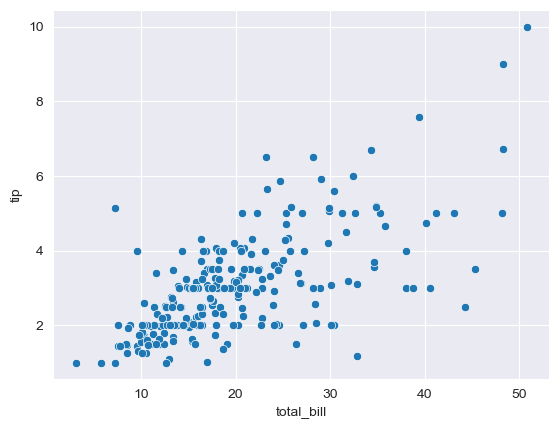

In [267]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.show()


In [268]:
# Yes the tip amount is dependent on the total bill. As we can see from the scatter plot as total bill increases, tip also increases. Tip has a moderate positive correlation with the total bill.¶


### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [269]:
df = pd.read_csv('tips.csv')

# Calculate the percentage of males and females
gender_counts = df['sex'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100



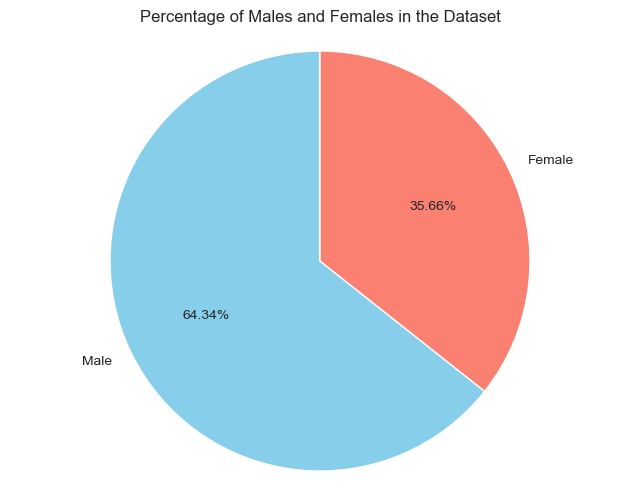

sex
Male      64.344262
Female    35.655738
Name: count, dtype: float64


In [270]:
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%2.2f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Percentage of Males and Females in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print the percentages
print(gender_percentages)

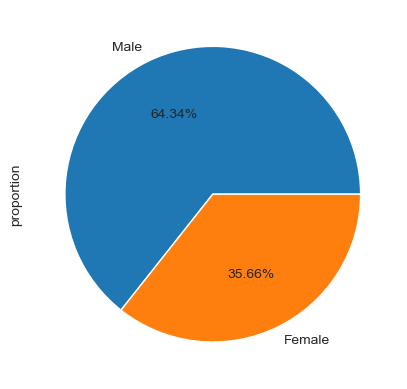

In [271]:
df['sex'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [272]:
df = pd.read_csv('tips.csv')

# Group by 'sex' and 'smoker' and count the occurrences
gender_smoker_count = df.groupby(['sex', 'smoker']).size().reset_index(name='count')


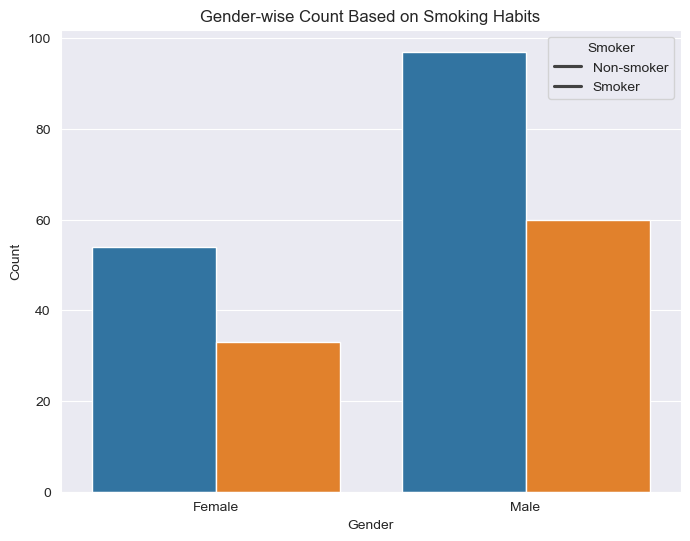

In [273]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_smoker_count, x='sex', y='count', hue='smoker')
plt.title('Gender-wise Count Based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-smoker', 'Smoker'])
plt.show()

In [274]:
pd.crosstab(df['sex'], df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [275]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

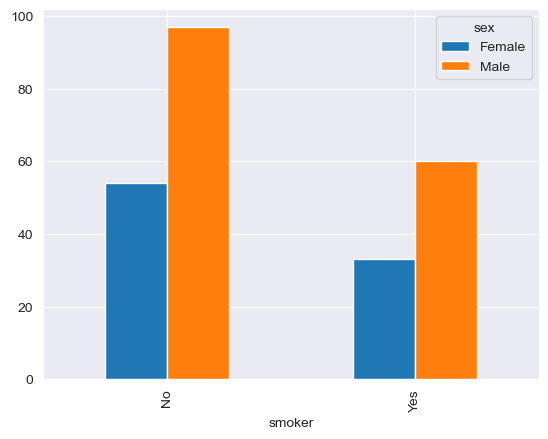

In [276]:
pd.crosstab(df['smoker'], df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [277]:
# Load the data
tips_df = pd.read_csv('tips.csv')

# Calculate average tip amount by day
average_tips_by_day = tips_df.groupby('day')['tip'].mean()


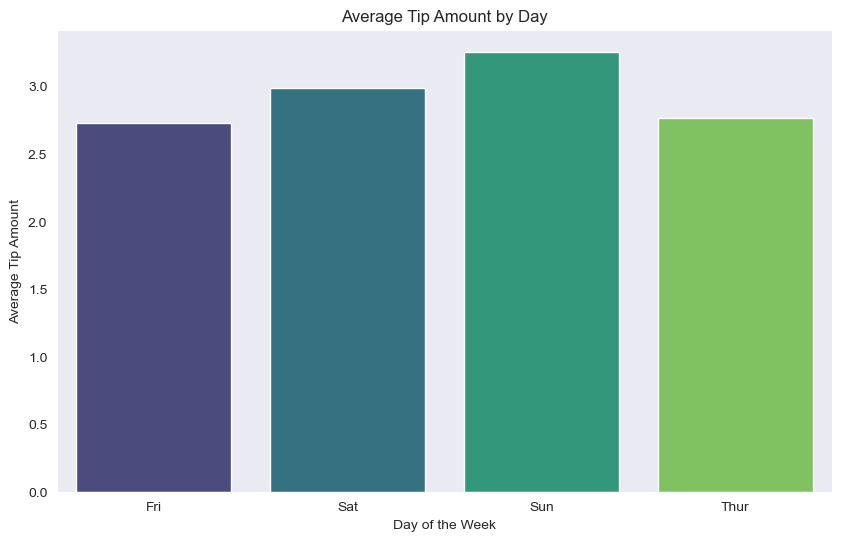

In [278]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=average_tips_by_day.index, y=average_tips_by_day.values, palette='viridis')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.grid(axis='y')
plt.show()

In [279]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

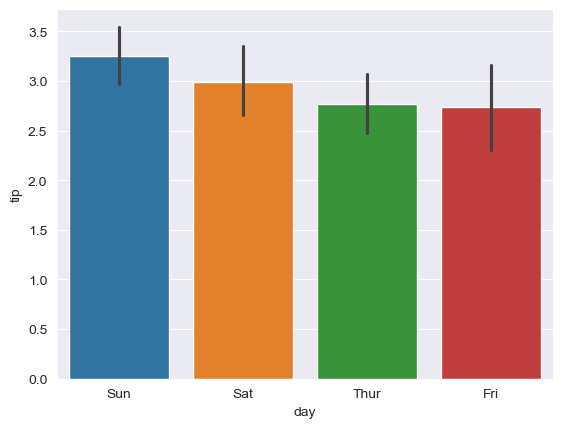

In [280]:
sns.barplot(x='day', y='tip', data=df, hue='day')
plt.show()


### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [281]:
avg_bill_by_size = df.groupby('size')['total_bill'].mean().reset_index()


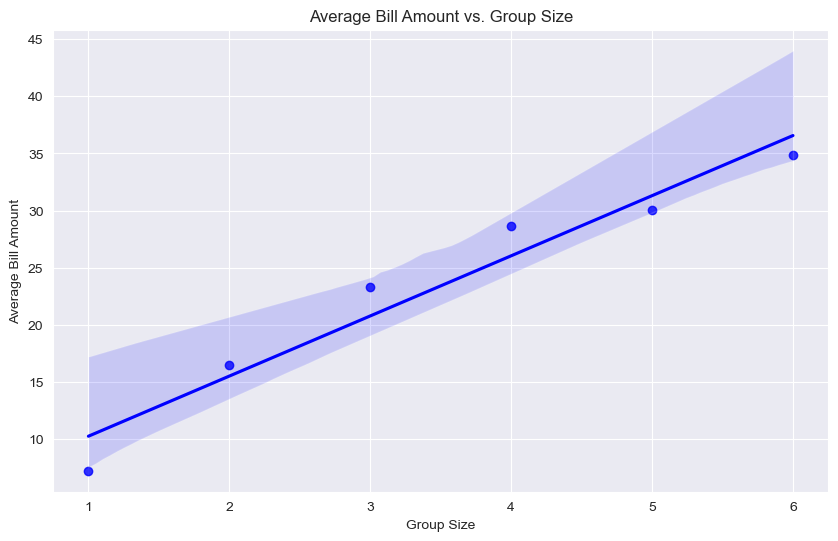

In [282]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=avg_bill_by_size, x='size', y='total_bill', marker='o', color='blue')
plt.title('Average Bill Amount vs. Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Bill Amount')
plt.xticks(avg_bill_by_size['size'])  # Set x-ticks to group sizes
plt.grid(True)
plt.show()

Findings
01. Trend:
    If the scatter plot shows an upward trend, it suggests that as the group size increases, the average bill amount also tends to increase. This could be due to larger groups ordering more food and drinks.
02. Strength of Relationship:
    The slope of the regression line indicates the strength of the relationship. A steep slope would imply a strong positive correlation between group size and average bill amount.
03. Variability:
    If the data points are widely spread around the regression line, it indicates variability in the bill amounts for different group sizes.

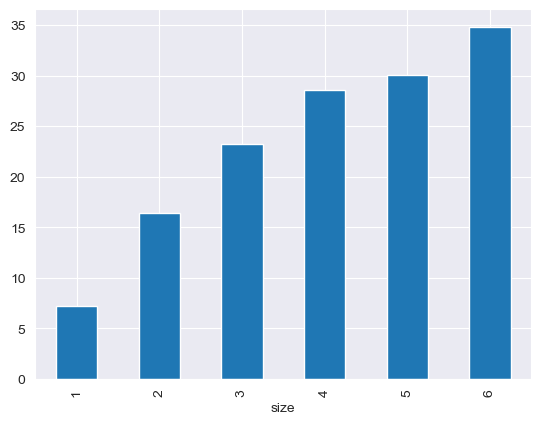

In [283]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

In [284]:
# Yes the average bill amount is dependent on the size of the group as we can analyse from the above graph with increase in the size of the group there is increase in the average bill paid.


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

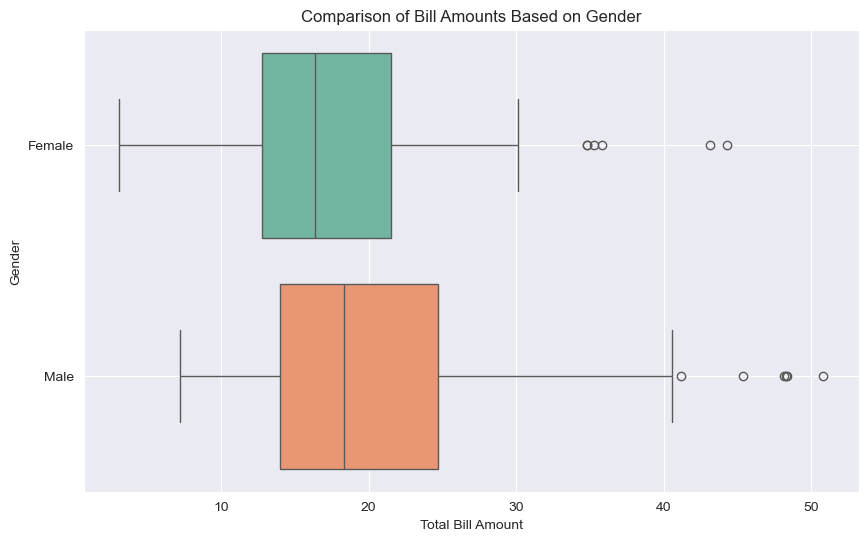

In [285]:
df = pd.read_csv('tips.csv')

# Create a horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='total_bill', y='sex', palette='Set2')
plt.title('Comparison of Bill Amounts Based on Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.grid(True)
plt.show()


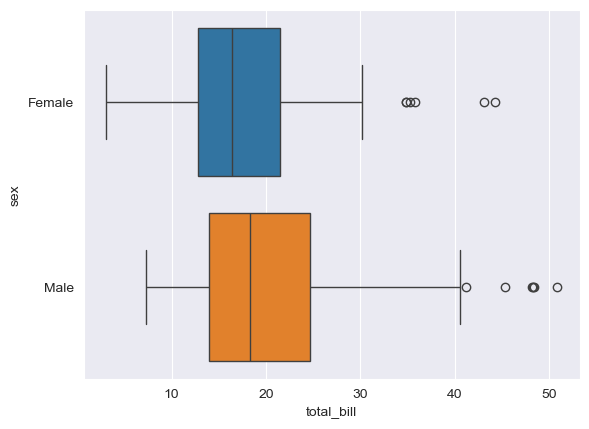

In [286]:
sns.boxplot(y = 'sex', x = 'total_bill', data=df, hue='sex')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [287]:
df = pd.read_csv('tips.csv')

# Filter for Saturday and Sunday
weekend_data = df[df['day'].isin(['Sat', 'Sun'])]

# Group by 'day' and 'time' and find the maximum bill amount
max_bill = weekend_data.groupby(['day', 'time'])['total_bill'].max().reset_index()

# Display the result
print(max_bill)

   day    time  total_bill
0  Sat  Dinner       50.81
1  Sun  Dinner       48.17


In [288]:
df.groupby(['day', 'time'])['total_bill'].max()

day   time  
Fri   Dinner    40.17
      Lunch     16.27
Sat   Dinner    50.81
Sun   Dinner    48.17
Thur  Dinner    18.78
      Lunch     43.11
Name: total_bill, dtype: float64

In [289]:
df.groupby(['time', 'day'])['total_bill'].max()


time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [290]:
df_day = df[(df['day'] == 'Sat') | (df['day'] == 'Sun')]
df_day.groupby('time')['total_bill'].max()

time
Dinner    50.81
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [291]:
missing_percentage = df.isnull().mean() * 100


In [292]:
print(missing_percentage[missing_percentage > 0])  # Only show columns with missing values


Series([], dtype: float64)


In [293]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [294]:
#There are no missing values in the Data Set

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [295]:
len(df[df.duplicated()])

1

In [296]:
# Yes, there is one duplicated record, let us drop them.


In [297]:
df_new=df.drop_duplicates(inplace = False)

In [298]:
df_new.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [299]:
df_new.drop_duplicates(inplace=True)

In [300]:
len(df_new[df_new.duplicated()])


0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

In [301]:
df = pd.read_csv('tips.csv')


In [302]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [303]:
# Identify outliers
outliers = df[(df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])

Number of outliers: 9


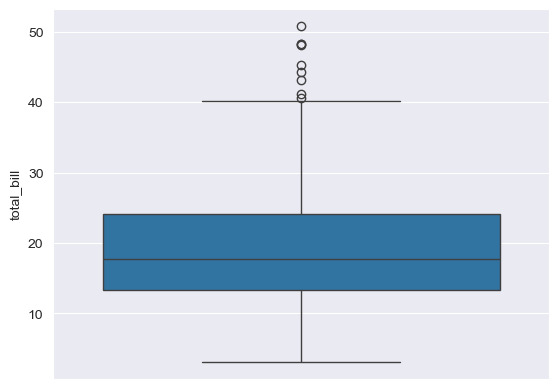

In [304]:
sns.boxplot(df['total_bill'])
plt.show()

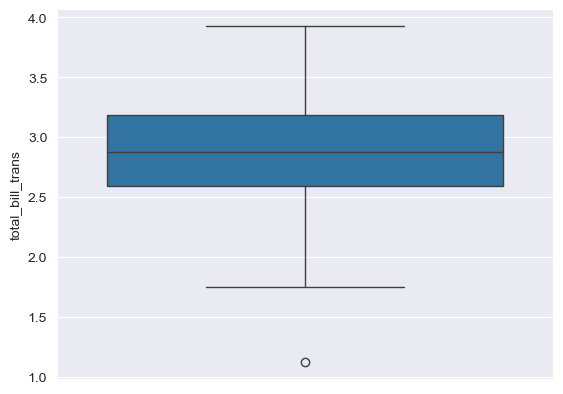

In [305]:
## treating outliers using log transformation
df['total_bill_trans'] = np.log(df['total_bill'])

## boxplot after transformation
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

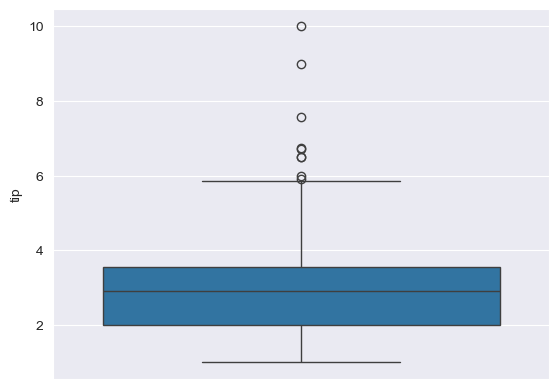

In [306]:
sns.boxplot(df['tip'])
plt.show()

In [307]:
# Using IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)

In [308]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)] # rows without outliers

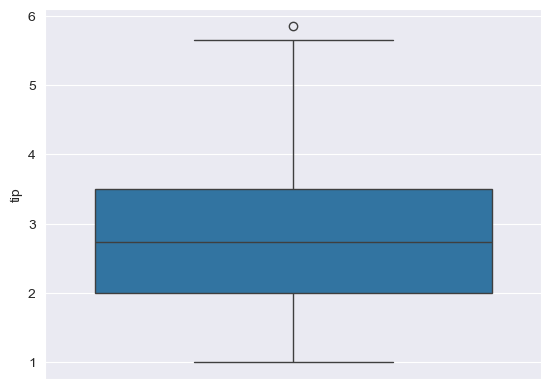

In [309]:
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [310]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
72,26.86,3.14,2,3.290638,False,True,True,False,False,False
78,22.76,3.00,2,3.125005,True,False,False,False,True,True
155,29.85,5.14,5,3.396185,False,False,False,True,False,False
3,23.68,3.31,2,3.164631,True,False,False,True,False,False
167,31.71,4.50,4,3.456632,True,False,False,True,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [311]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

47.74


In [312]:
## initialize minmaxscalar
mm = MinMaxScaler()

In [313]:
## Normalizing the values of the total_bill, so that the range will be 1.
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [314]:
## checking the range after normalization
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [315]:
## Encoding categorical variables
tips_df = pd.read_csv('tips.csv')

tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [316]:
## Storing the target column in Y variable and the rest of the columns in the X variable.
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

In [317]:
# ALternate Solution

In [318]:
# Load the dataset
tips_df = pd.read_csv('tips.csv')

# i) Encode the categorical variables
label_encoders = {}
categorical_cols = ['sex', 'smoker', 'day', 'time']


In [319]:
for col in categorical_cols:
    le = LabelEncoder()
    tips_df[col] = le.fit_transform(tips_df[col])
    label_encoders[col] = le  # Store the label encoder for potential future use

In [320]:
# ii) Store the target column in y and the rest of the columns in X
y = tips_df['tip']
X = tips_df.drop(columns=['tip'])

# Display the first few rows of X and y
print("X (Features):")
print(X.head())
print("\ny (Target):")
print(y.head())

X (Features):
   total_bill  sex  smoker  day  time  size
0       16.99    0       0    2     0     2
1       10.34    1       0    2     0     3
2       21.01    1       0    2     0     3
3       23.68    1       0    2     0     2
4       24.59    0       0    2     0     4

y (Target):
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [321]:
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

## Scaling the data using min max scaling
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(170, 6) (74, 6)
(170,) (74,)


In [322]:
# Alternatively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the columns "total_bill" and "size" using Min-Max scaling
scaler = MinMaxScaler()

# Fit the scaler only on the training data
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])

# Transform the test data using the same scaler
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Display the standardized training data
print("Standardized Training Data (first few rows):")
print(X_train.head())

Standardized Training Data (first few rows):
     total_bill  sex  smoker  day  time  size
234    0.217044    1       1    1     0   0.2
227    0.326232    1       0    1     0   0.6
180    0.641367    1       1    2     0   0.6
5      0.433644    1       0    2     0   0.6
56     0.715934    1       1    1     0   0.6


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [323]:
## Fitting a linear regression model on the train data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [324]:
## Making predictions on the test data
pred = lr.predict(X_test)

In [325]:
## Computing r2_score
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.2911426514546809


In [326]:
# Alternatively


In [327]:
# Load the dataset
tips_df = pd.read_csv('tips.csv')

# Encode categorical variables
label_encoders = {}
categorical_cols = ['sex', 'smoker', 'day', 'time']

for col in categorical_cols:
    le = LabelEncoder()
    tips_df[col] = le.fit_transform(tips_df[col])
    label_encoders[col] = le

In [328]:
# Store target and features
y = tips_df['tip']
X = tips_df.drop(columns=['tip'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the columns "total_bill" and "size" using Min-Max scaling
scaler = MinMaxScaler()


In [329]:
# Fit the scaler only on the training data
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])

# Transform the test data using the same scaler
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [331]:
# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)

# Print the R-squared value
print(f"\nR-squared value of the prediction on the test data: {r_squared:.4f}")


R-squared value of the prediction on the test data: 0.2911


### Happy Learning:)